## Redwine Quality EDA

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

redwine_df = pd.read_csv('../data/winequality-red.csv')

redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
redwine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
count_duplicate = redwine_df.duplicated().sum()
print("duplicate rows: ", count_duplicate)

duplicate rows:  240


Ta có 240 dòng trùng lặp dữ liệu nên ta sẽ xóa bỏ các dòng trùng lặp

In [9]:
redwine_df = redwine_df.drop_duplicates()
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [10]:
redwine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
redwine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dữ liệu không có giá trị null và NaN

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

redwine_df['alcohol_level'] = pd.cut(redwine_df['alcohol'], bins=[8,10,12,14], labels=['Low','Medium','High'])
redwine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low


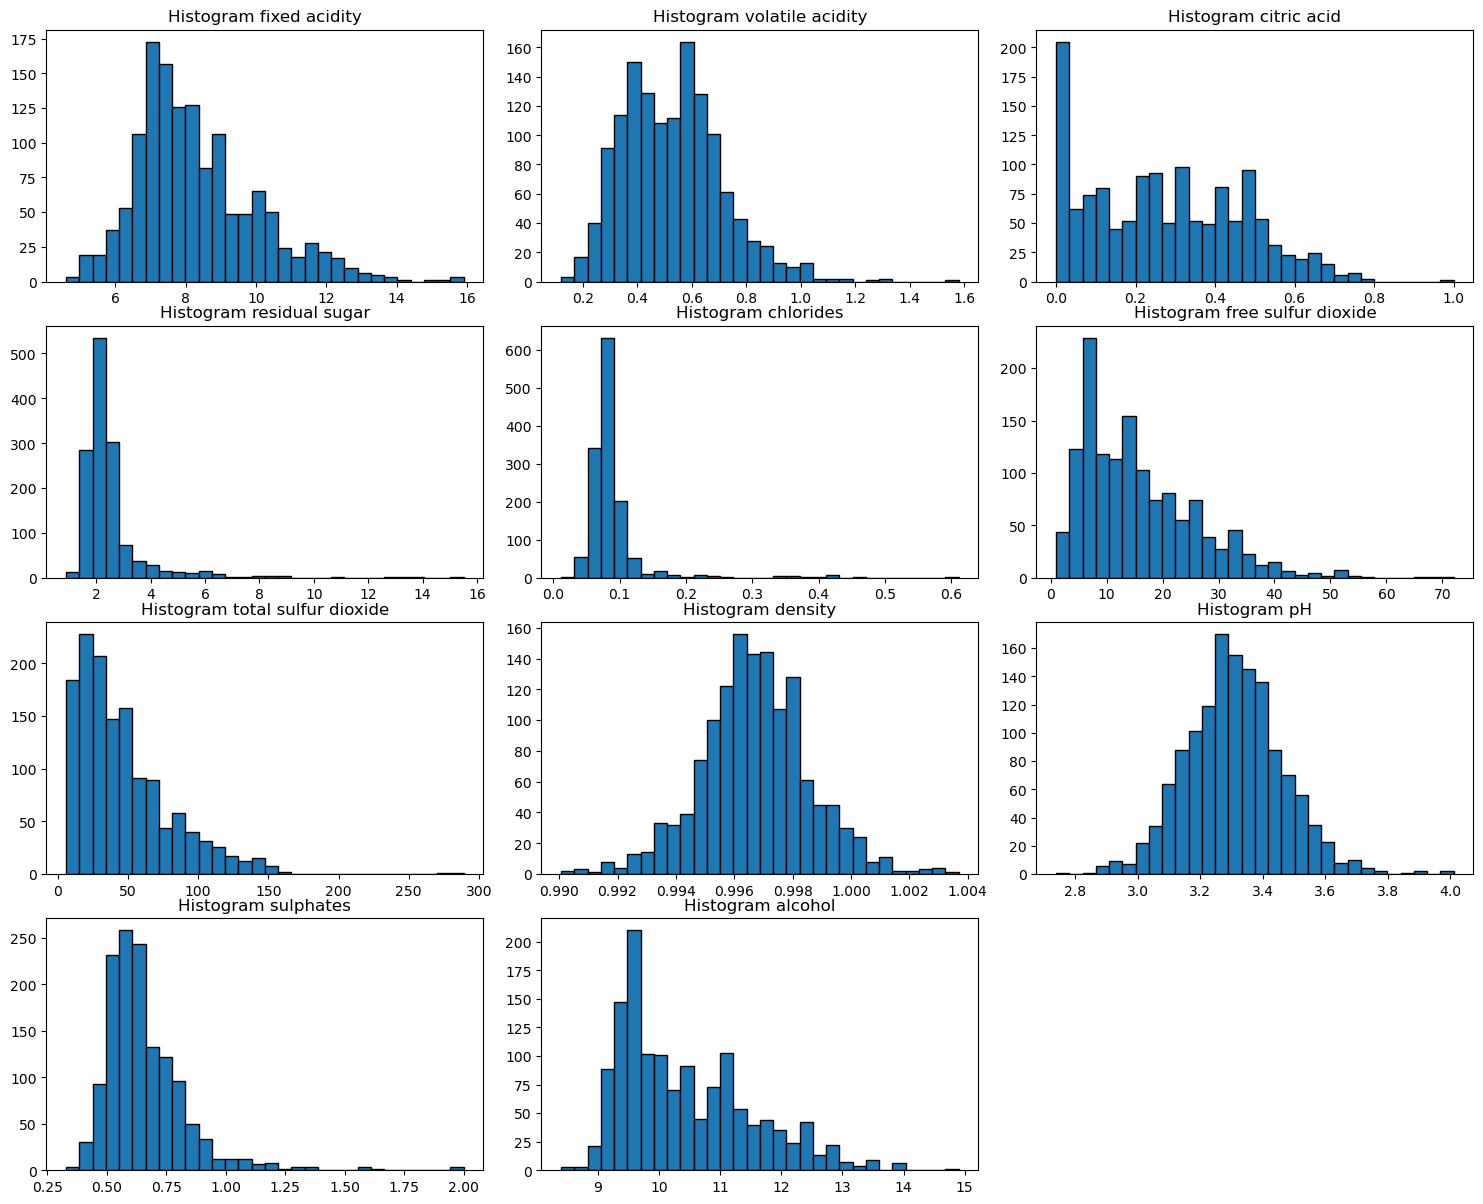

In [41]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
ax = ax.flatten()
plt.tight_layout()
for i, col in enumerate(features):
    ax[i].hist(redwine_df[col], bins=30, edgecolor='black')
    ax[i].set_title(f"Histogram {col}")
for j in range(i+1, len(ax)):
    ax[j].set_visible(False)

## Kết luận:
* residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates đều có nhiều giá trị nhỏ, nhưng một số ít giá trị rất lớn kéo đuôi phân phối về bên phải.
* Không phải phân phối liên tục, có nhiều giá trị 0 → cho thấy nhiều mẫu rượu không có hoặc rất ít acid citric.
* fixed acidity lệch phải nhẹ, tập trung nhiều ở mức 6–8.
* volatile acidity phân phối gần đối xứng hơn, nhưng vẫn hơi lệch phải.

<Axes: xlabel='quality', ylabel='count'>

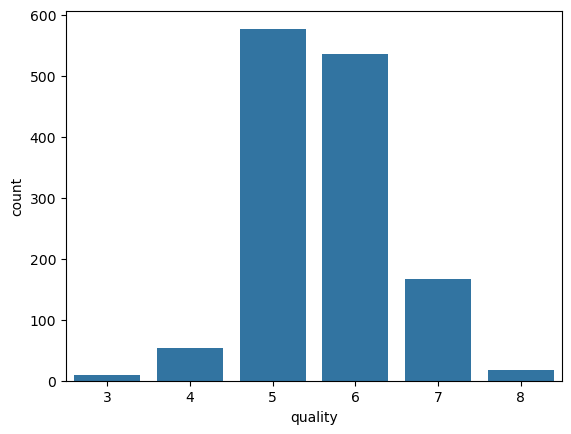

In [48]:
sns.countplot(data=redwine_df, x='quality')

## Kết luận

* Rượu có chất lượng 5, 6 điểm chiếm đa số
* Rượu có chất lượng 4, 7 và 8 điểm có tần suất thấp hơn đáng kể (khoảng 100-200)
* Rượu chất lượng 3 điểm hầu như không xuất hiện
* Biểu đồ có xu hương hơi lệch trái

Text(0.5, 1.0, 'Heatmap ma trận tương quan các thuộc tính')

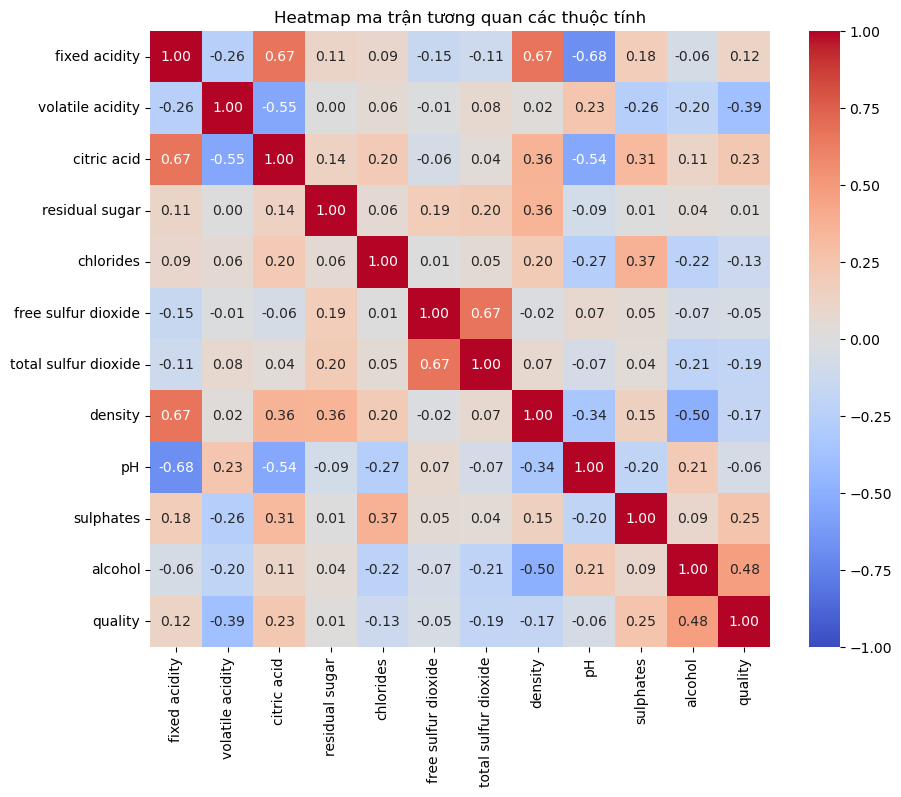

In [12]:
redwine_df = pd.read_csv('../data/winequality-red.csv')

cor = redwine_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, fmt=".2f", cmap="coolwarm", vmax=1.0, vmin=-1.0);
plt.title("Heatmap ma trận tương quan các thuộc tính")

## Kết luận:
* alcohol có tương quan dương khá cao với chất lượng (0.48). Rượu có độ cồn cao thường được đánh giá chất lượng tốt hơn.

* volatile acidity có tương quan âm vừa với chất lượng (-0.39). Rượu có độ acid bay hơi cao thì chất lượng thấp.

* citric acid cũng có liên hệ dương nhẹ với chất lượng (0.23).

* Các biến khác (sulphates, residual sugar, …) chỉ có tương quan yếu với quality.

* free sulfur dioxide đi đôi với total sulfur dioxide.